In [1]:
import phoebe
import numpy as np
from spice.models.phoebe_model import PhoebeModel
from spice.spectrum import simulate_spectrum
from transformer_payne import Blackbody

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


In [2]:
import astropy.units as u
u.solRad.to(u.cm)

69570000000.0

In [3]:
4*np.pi*69570000000.0**2

6.082104402130212e+22

In [4]:
import matplotlib
%matplotlib inline

In [5]:
from phoebe.parameters.dataset import _mesh_columns

In [6]:
b = phoebe.default_binary()
#b.set_quantity('incl', 45)
times = np.linspace(0, 24*3600, 10)
COLUMNS = _mesh_columns
b.set_quantity('period@binary', 1)
b.add_dataset('mesh', times=times, columns=COLUMNS, dataset='mesh01')
b.add_dataset('orb', compute_times=times, dataset='orb01')
b.run_compute(irrad_method='none', coordinates='uvw')

100%|██████████| 10/10 [00:00<00:00, 39.21it/s]


<ParameterSet: 637 parameters | kinds: orb, mesh>

In [7]:
from spice.models.phoebe_utils import PhoebeConfig
p1 = PhoebeConfig(b, 'mesh01', 'orb01')

In [8]:
b.get_parameter(qualifier='us', component='primary', dataset='orb01', kind='orb')

<Parameter: us=[1.62265701e-16 1.54331949e-11 2.40752930e-11 ...
 6.72810764e-11 7.59214093e-11 8.45635075e-11] solRad | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>

In [9]:
bb = Blackbody()
pm1 = PhoebeModel.construct(p1, times[2], bb.parameter_names, component='primary')
pm2 = PhoebeModel.construct(p1, times[2], bb.parameter_names, component='secondary')

In [10]:
from spice.models.binary import Binary, PhoebeBinary

binary = Binary.from_bodies(pm1, pm2)
pb = PhoebeBinary.construct(p1, 0., bb.parameter_names)

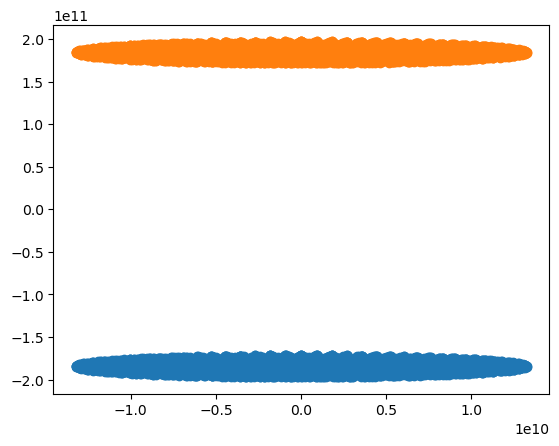

In [12]:
import matplotlib.pyplot as plt

plt.scatter(pb.body1.centers[:, 0], pb.body1.centers[:, 2])

plt.scatter(pb.body2.centers[:, 0], pb.body2.centers[:, 2])

In [ ]:
u.day.to(u.year)

0.0027378507871321013

In [ ]:
binary.body1.cast_centers

array([[-2.79350229e+09,  6.88209702e+10, -1.89199369e+11],
       [-5.58699696e+09,  6.88094828e+10, -1.84360896e+11],
       [-2.79349629e+09,  6.88041133e+10, -1.79522415e+11],
       ...,
       [ 2.34092083e+10, -4.05490865e+10, -1.32729697e+11],
       [ 2.40236187e+10, -3.62151903e+10, -1.29753250e+11],
       [ 2.09323093e+10, -3.58184742e+10, -1.28195854e+11]])

In [ ]:
binary.body2.cast_centers

array([[ 2.79350229e+09,  6.88209702e+10,  1.89199369e+11],
       [ 5.58699696e+09,  6.88094828e+10,  1.84360896e+11],
       [ 2.79349629e+09,  6.88041133e+10,  1.79522415e+11],
       ...,
       [-2.34092083e+10, -4.05490865e+10,  1.32729697e+11],
       [-2.40236187e+10, -3.62151903e+10,  1.29753250e+11],
       [-2.09323093e+10, -3.58184742e+10,  1.28195854e+11]])

(<Figure size 1000x1200 with 2 Axes>,
 <Axes3D: xlabel='$X [R_\\odot]$', ylabel='$Y [R_\\odot]$', zlabel='$Z [R_\\odot]$'>)

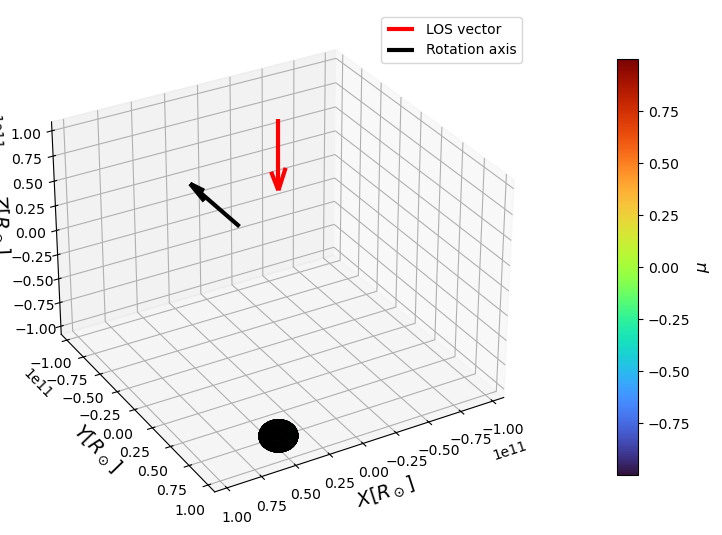

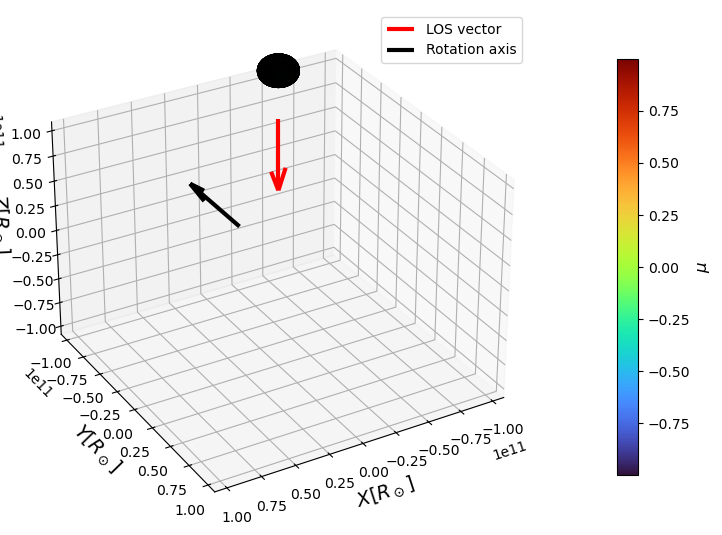

In [ ]:
from spice.plots import plot_3D
plot_3D(binary.body1)
plot_3D(binary.body2)

In [ ]:
ws = np.linspace(4000, 10000, 1000)
s = simulate_spectrum(b.intensity, pm, np.log10(ws))

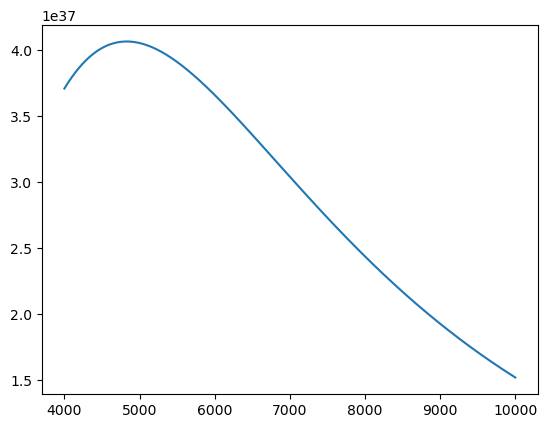

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ws, s[:, 0])

In [ ]:
from spice.plots import plot_3D
import matplotlib as mpl
from mpl_toolkits.mplot3d import art3d

Is the rotation axis and LOS vector reversed actually?

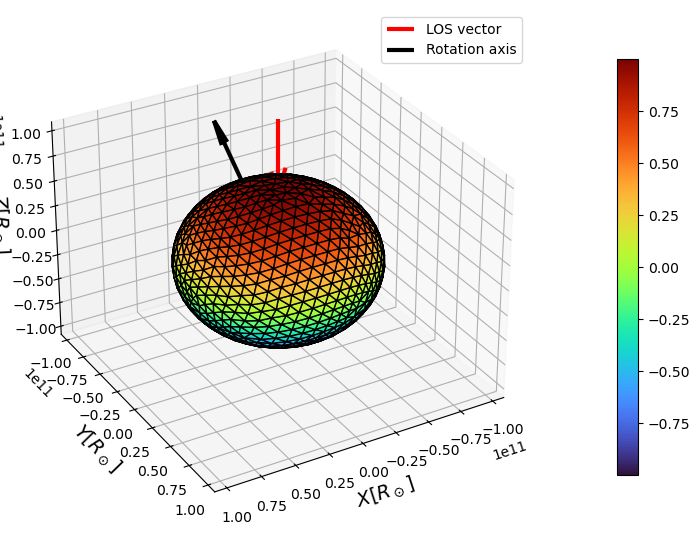

In [ ]:
fig = plt.figure(figsize=(10, 12))
spec = fig.add_gridspec(10, 12)
plot_ax = fig.add_subplot(spec[:, :11], projection='3d')
plot_ax.view_init(elev=30, azim=60)
axes_lim = 1.5*pm.radius
plot_ax.set_xlim3d(-axes_lim, axes_lim)
plot_ax.set_ylim3d(-axes_lim, axes_lim)
plot_ax.set_zlim3d(-axes_lim, axes_lim)
plot_ax.set_xlabel('$X [R_\\odot]$', fontsize=14)
plot_ax.set_ylabel('$Y [R_\\odot]$', fontsize=14)
plot_ax.set_zlabel('$Z [R_\\odot]$', fontsize=14)
normalized_los_vector = pm.los_vector/np.linalg.norm(pm.los_vector)
normalized_rotation_axis = pm.rotation_axis/np.linalg.norm(pm.rotation_axis)
mesh=pm
plot_ax.quiver(*(-2.0*mesh.radius*normalized_los_vector), *(mesh.radius*normalized_los_vector),
                   color='red', linewidth=3., label='LOS vector')
plot_ax.quiver(*(0.75*mesh.radius*normalized_rotation_axis), *(mesh.radius*normalized_rotation_axis),
                color='black', linewidth=3., label='Rotation axis')
plot_ax.legend()
vs2 = mesh.cast_vertices
to_be_mapped = pm.mus
norm = mpl.colors.Normalize(vmin=to_be_mapped.min(), vmax=to_be_mapped.max())
mappable = mpl.cm.ScalarMappable(cmap='turbo', norm=norm)
face_colors = mpl.colormaps['turbo'](norm(to_be_mapped))
p = art3d.Poly3DCollection(vs2, facecolors=face_colors, edgecolor="black")
plot_ax.add_collection(p)
mappable.set_array([])
cbar = fig.colorbar(mappable, shrink=0.45, pad=0.125, ax=plot_ax)

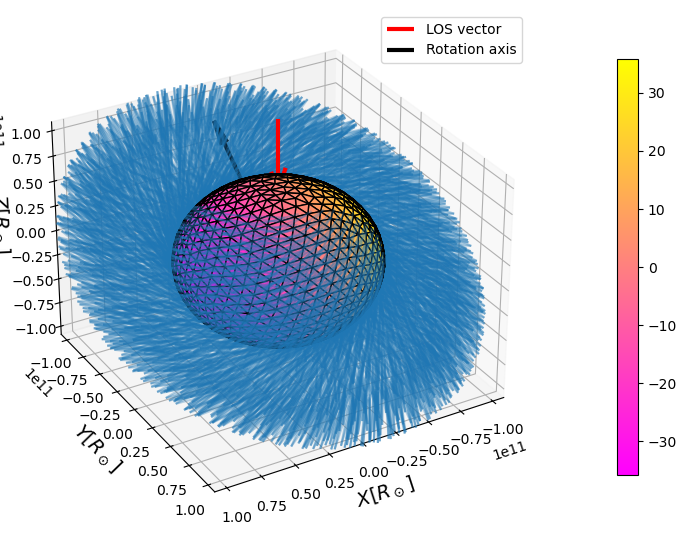

In [ ]:
fig = plt.figure(figsize=(10, 12))
spec = fig.add_gridspec(10, 12)
plot_ax = fig.add_subplot(spec[:, :11], projection='3d')
plot_ax.view_init(elev=30, azim=60)
axes_lim = 1.5*pm.radius
plot_ax.set_xlim3d(-axes_lim, axes_lim)
plot_ax.set_ylim3d(-axes_lim, axes_lim)
plot_ax.set_zlim3d(-axes_lim, axes_lim)
plot_ax.set_xlabel('$X [R_\\odot]$', fontsize=14)
plot_ax.set_ylabel('$Y [R_\\odot]$', fontsize=14)
plot_ax.set_zlabel('$Z [R_\\odot]$', fontsize=14)
normalized_los_vector = pm.los_vector/np.linalg.norm(pm.los_vector)
normalized_rotation_axis = pm.rotation_axis/np.linalg.norm(pm.rotation_axis)
mesh=pm
plot_ax.quiver(*(-2.0*mesh.radius*normalized_los_vector), *(mesh.radius*normalized_los_vector),
                   color='red', linewidth=3., label='LOS vector')
plot_ax.quiver(*(0.75*mesh.radius*normalized_rotation_axis), *(mesh.radius*normalized_rotation_axis),
                color='black', linewidth=3., label='Rotation axis')
plot_ax.legend()
vs2 = mesh.cast_vertices
to_be_mapped = pm.los_velocities
norm = mpl.colors.Normalize(vmin=to_be_mapped.min(), vmax=to_be_mapped.max())
mappable = mpl.cm.ScalarMappable(cmap='spring', norm=norm)
face_colors = mpl.colormaps['spring'](norm(to_be_mapped))
c = pm.centers
v = pm.center_velocities
for cc, vv in zip(c, v):
    plot_ax.quiver(*(cc), *(0.04*mesh.radius*vv), alpha=0.3)
p = art3d.Poly3DCollection(vs2, facecolors=face_colors, edgecolor="black")
plot_ax.add_collection(p)
mappable.set_array([])
cbar = fig.colorbar(mappable, shrink=0.45, pad=0.125, ax=plot_ax)

In [ ]:
pm.rotation_axis

array([ 0.        , -0.70710678,  0.70710678])

In [ ]:
np.rad2deg(np.arcsin(pm.rotation_axis[1]))

-44.99999999999999

In [ ]:
pm.rotation_velocity

50.59273169218562

In [ ]:
pm.radius/u.solRad.to(u.cm)

1.0